In [53]:
import numpy as np
from utils import *
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def plot_data(X_raw,Y):
    pos = np.argwhere(Y == 1)
    neg = np.argwhere(Y == 0)
    plt.figure(figsize=(10,6), dpi=80)
    plt.scatter(X_raw[pos,0],X_raw[pos,1],marker='+',c='black',label='Admitted')
    plt.scatter(X_raw[neg,0],X_raw[neg,1],marker='o',c='r' ,label='Not Admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(loc='upper right')
    
    return plt

In [3]:
def initilization(X_raw):
    m,n = X_raw.shape
    X = np.column_stack((np.ones((m,1)) , X_raw))
    theta = np.zeros((n+1,1))
    
    return X,theta

In [4]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [5]:
def compute_cost(X,Y,theta,lambd = 0):
    m = X.shape[0]
    H_theta = sigmoid( np.dot(X,theta) )
    J = np.sum( Y*np.log(H_theta) + (1-Y)*np.log(1-H_theta) )/-m + (lambd/(2*m))*np.sum( np.power(theta,2) )
    
    return J,H_theta

In [6]:
def gradient_scent(X,Y,H_theta,lambd = 0):
    m = X.shape[0]
    D_theta = np.sum( (H_theta-Y)*X , axis = 0 ,keepdims=True  ).transpose()/m + (lambd/m)*( np.row_stack( (0,theta[1:])  ) )
    
    return D_theta

In [45]:
def model(X,Y,theta,alpha=0.01,lambd=0,iter_nums=400):
    
    J_history = []
    for i in range(iter_nums):
        J,H_theta = compute_cost(X,Y,theta,lambd)
        D_theta = gradient_scent(X,Y,H_theta,lambd)
        theta -= alpha*D_theta
        J_history.append(J)
    
    return theta,J_history

In [8]:
def predict(X,theta):
    return np.round(sigmoid( np.dot(X,theta) ))

In [33]:
def plot_boundary(theta,X,Y):
    plts = plot_data(X[:,1:],Y)
    if X.shape[1] <= 3:
        plot_x = np.array([ np.min(X[:,1]) -2 , np.max(X[:,1]) + 2 ])
        plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])        
        plts.plot(plot_x,plot_y)
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((50,50))

        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] =  np.dot(mapFeature(u[i],v[j],plot=True),theta)

        z = z.transpose()
        plts.contour(u, v, z, 0, alpha=.75)
        
    plts.show()

accuracy:83.89830508474576%


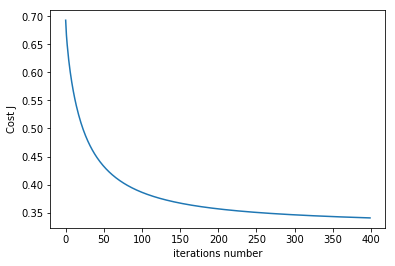

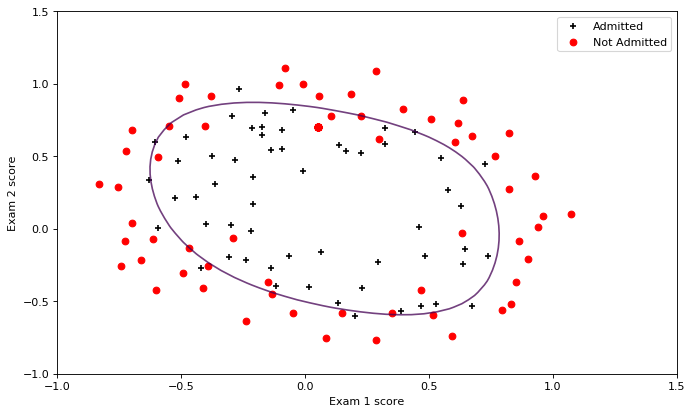

In [70]:
X,Y = load('ex2data2.h5')
res = mapFeature(X[:,0],X[:,1],degree=6)
X_train,theta = initilization(res)
#theta = np.ones((X_train.shape[1],1))

lambd = 0
iter_nums = 400
alpha = 2.5
theta,J_history = model(X_train,Y,theta,alpha=alpha,lambd=lambd,iter_nums=iter_nums)
accuracy = predict(X_train,theta)

print('accuracy:{}%'.format( np.mean(Y==accuracy)*100 ))
plt.plot(np.arange(iter_nums),J_history)
plt.xlabel('iterations number')
plt.ylabel('Cost J')
plt.show()
plot_boundary(theta,X_train,Y)

In [11]:
def mapFeature(X1,X2,degree=6,plot = False):
    res = None
    for i in range(1,degree+1):
        for j in range(i+1):
            temp = np.power(X1,i-j) * np.power(X2,j)
            if res is None:
                res = temp
            else:
                res = np.column_stack( (res,temp) )
    if plot:
        res = np.column_stack( (np.ones((res.shape[0],1))  ,res) )
    return res